In [1]:
import bat
from bat.log_to_dataframe import LogToDataFrame
from bat.dataframe_to_matrix import DataFrameToMatrix
print('bat: {:s}'.format(bat.__version__))
import pandas as pd
print('Pandas: {:s}'.format(pd.__version__))
import numpy as np
print('Numpy: {:s}'.format(np.__version__))
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
print('Scikit Learn Version:', sklearn.__version__)

bat: 0.3.7
Pandas: 0.24.2
Numpy: 1.16.2
Scikit Learn Version: 0.21.2


In [2]:
# Create a Pandas dataframe from the Bro HTTP log
log_to_df = LogToDataFrame()
bro_df = log_to_df.create_dataframe('http.log')
print('Read in {:d} Rows...'.format(len(bro_df)))
bro_df.head()

Read in 236 Rows...


,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,tags,username,password,proxied,orig_fuids,orig_filenames,orig_mime_types,resp_fuids,resp_filenames,resp_mime_types
ts,,,,,,,,,,,,,,,,,,,,,
2019-07-19 18:52:35.253660917,ClIPdC4JyaYWzFLO1j,172.16.4.205,49171,184.50.26.32,80,1,GET,www.msftncsi.com,/ncsi.txt,NaN,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,Fi919y1tJBBrX3QQ6f,NaN,text/plain
2019-07-19 18:52:56.362874031,CFEpH04NoKcOVn9Pp2,172.16.4.205,49188,23.219.38.65,80,1,GET,detectportal.firefox.com,/success.txt,NaN,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,FMEiHA4kY4MChgcoS2,NaN,NaN
2019-07-19 18:52:56.402968884,CTzHhDu5TWCXCslw9,172.16.4.205,49190,166.62.111.64,80,1,GET,mysocalledchaos.com,/,NaN,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,F0w0a42kPUCvSA2l3j,NaN,text/html
2019-07-19 18:52:59.317110062,Cn4nLf1PIT4ir4XQg4,172.16.4.205,49198,166.62.111.64,80,1,GET,mysocalledchaos.com,/wp-content/plugins/social-warfare/assets/js/p...,http://mysocalledchaos.com/,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,Fol3br4mLr8gcEqwKe,NaN,text/plain
2019-07-19 18:52:59.363258123,CTzHhDu5TWCXCslw9,172.16.4.205,49190,166.62.111.64,80,2,GET,mysocalledchaos.com,/wp-content/plugins/instagram-feed/css/sb-inst...,http://mysocalledchaos.com/,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,FTsk22pUwGtUJBOzh,NaN,text/plain


In [3]:
# We're going to pick some features that might be interesting
# some of the features are numerical and some are categorical
features = ['id.resp_p', 'method', 'resp_mime_types', 'request_body_len']

In [4]:
# Show the dataframe with mixed feature types
bro_df[features].head()

,id.resp_p,method,resp_mime_types,request_body_len
ts,,,,
2019-07-19 18:52:35.253660917,80,GET,text/plain,0
2019-07-19 18:52:56.362874031,80,GET,NaN,0
2019-07-19 18:52:56.402968884,80,GET,text/html,0
2019-07-19 18:52:59.317110062,80,GET,text/plain,0
2019-07-19 18:52:59.363258123,80,GET,text/plain,0


In [5]:
# Use the bat DataframeToMatrix class (handles categorical data)
# You can see below it uses a heuristic to detect category data. When doing
# this for real we should explicitly convert before sending to the transformer.
to_matrix = DataFrameToMatrix()
bro_matrix = to_matrix.fit_transform(bro_df[features], normalize=True)
print(bro_matrix.shape)
bro_matrix[:1]

Normalizing column id.resp_p...
Normalizing column request_body_len...
(236, 17)


array([[0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [6]:
# Train/fit and Predict anomalous instances using the Isolation Forest model
odd_clf = IsolationForest(behaviour='new', contamination=0.25) # Marking 25% odd
odd_clf.fit(bro_matrix)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.25,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [7]:
# Now we create a new dataframe using the prediction from our classifier
odd_df = bro_df[features][odd_clf.predict(bro_matrix) == -1]
print(odd_df.shape)
odd_df.head()

(57, 4)


,id.resp_p,method,resp_mime_types,request_body_len
ts,,,,
2019-07-19 18:52:56.362874031,80,GET,NaN,0
2019-07-19 18:52:56.402968884,80,GET,text/html,0
2019-07-19 18:53:00.372859955,80,GET,application/font-woff2,0
2019-07-19 18:53:00.377995014,80,GET,application/font-woff2,0
2019-07-19 18:53:00.416703939,80,GET,application/font-woff2,0


In [8]:
# Now we're going to explore our odd dataframe with help from KMeans and PCA algorithms
odd_matrix = to_matrix.fit_transform(odd_df)

Normalizing column id.resp_p...
Normalizing column request_body_len...


In [9]:
# Just some simple stuff for this example, KMeans and PCA
kmeans = KMeans(n_clusters=4).fit_predict(odd_matrix)  # Change this to 3/5 for fun
pca = PCA(n_components=3).fit_transform(odd_matrix)

# Now we can put our ML results back onto our dataframe!
odd_df['x'] = pca[:, 0] # PCA X Column
odd_df['y'] = pca[:, 1] # PCA Y Column
odd_df['cluster'] = kmeans
odd_df.head()

,id.resp_p,method,resp_mime_types,request_body_len,x,y,cluster
ts,,,,,,,
2019-07-19 18:52:56.362874031,80,GET,NaN,0,0.137867,0.234862,0
2019-07-19 18:52:56.402968884,80,GET,text/html,0,-0.171010,0.319548,0
2019-07-19 18:53:00.372859955,80,GET,application/font-woff2,0,-0.247156,0.659815,0
2019-07-19 18:53:00.377995014,80,GET,application/font-woff2,0,-0.247155,0.659815,0
2019-07-19 18:53:00.416703939,80,GET,application/font-woff2,0,-0.247155,0.659815,0


In [10]:
# Plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14.0
plt.rcParams['figure.figsize'] = 15.0, 6.0

# Helper method for scatter/beeswarm plot
def jitter(arr):
    stdev = .02*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

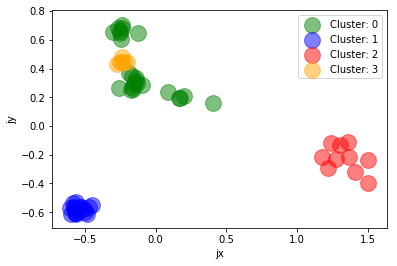

In [13]:
# Jitter so we can see instances that are projected coincident in 2D
odd_df['jx'] = jitter(odd_df['x'])
odd_df['jy'] = jitter(odd_df['y'])

# Now use dataframe group by cluster
cluster_groups = odd_df.groupby('cluster')

# Plot the Machine Learning results
colors = {0:'green', 1:'blue', 2:'red', 3:'orange', 4:'purple', 5:'brown'}
fig, ax = plt.subplots()
for key, group in cluster_groups:
    group.plot(ax=ax, kind='scatter', x='jx', y='jy', alpha=0.5, s=250,
               label='Cluster: {:d}'.format(key), color=colors[key])

In [14]:
# Now print out the details for each cluster
pd.set_option('display.width', 1000)
for key, group in cluster_groups:
    print('\nCluster {:d}: {:d} observations'.format(key, len(group)))
    print(group[features].head())


Cluster 0: 24 observations
                               id.resp_p method         resp_mime_types  request_body_len
ts                                                                                       
2019-07-19 18:52:56.362874031         80    GET                     NaN                 0
2019-07-19 18:52:56.402968884         80    GET               text/html                 0
2019-07-19 18:53:00.372859955         80    GET  application/font-woff2                 0
2019-07-19 18:53:00.377995014         80    GET  application/font-woff2                 0
2019-07-19 18:53:00.416703939         80    GET  application/font-woff2                 0

Cluster 1: 17 observations
                               id.resp_p method resp_mime_types  request_body_len
ts                                                                               
2019-07-19 18:53:01.214835882         80    GET      image/jpeg                 0
2019-07-19 18:53:01.149458885         80    GET      image/jpeg     

In [15]:
odd_df[odd_df['cluster'] == 2]

,id.resp_p,method,resp_mime_types,request_body_len,x,y,cluster,jx,jy
ts,,,,,,,,,
2019-07-19 18:53:00.644175053,80,POST,text/plain,180,1.210274,-0.248457,2,1.178713,-0.218721
2019-07-19 18:53:12.186537981,80,POST,text/plain,72,1.210271,-0.248456,2,1.222431,-0.294668
2019-07-19 18:53:16.019727945,80,POST,text/plain,19478,1.210869,-0.248590,2,1.274646,-0.226938
2019-07-19 18:57:24.033343077,443,POST,text/plain,22,1.448960,-0.339298,2,1.504058,-0.394118
2019-07-19 18:57:24.053761005,443,POST,text/plain,240,1.448966,-0.339300,2,1.410187,-0.319834
2019-07-19 18:57:23.478950977,80,POST,NaN,3592206,1.360497,-0.149921,2,1.360047,-0.110780
2019-07-19 18:57:20.213206053,80,POST,NaN,272,1.249668,-0.125288,2,1.242111,-0.118503
2019-07-19 18:59:06.620346069,80,POST,NaN,3592220,1.360497,-0.149921,2,1.307412,-0.130542
2019-07-19 18:57:24.399497032,443,POST,NaN,76,1.488353,-0.216129,2,1.369605,-0.216527


In [23]:
bro_df[bro_df['request_body_len'] == 19478]

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,tags,username,password,proxied,orig_fuids,orig_filenames,orig_mime_types,resp_fuids,resp_filenames,resp_mime_types
ts,,,,,,,,,,,,,,,,,,,,,
2019-07-19 18:53:16.019727945,CFMoIG3QKa61irNbQ3,172.16.4.205,49249,185.243.115.84,80,2,POST,b5689023.green.mattingsolutions.co,/empty.gif,NaN,...,(empty),NaN,NaN,NaN,F9jitBqw3Kd0GMnjh,NaN,text/plain,F1AaOKZWBTCZxTDK2,NaN,text/plain


In [21]:
conn_df = log_to_df.create_dataframe('conn.log')

In [24]:
conn_df[conn_df['uid'] == "CFMoIG3QKa61irNbQ3"]

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
ts,,,,,,,,,,,,,,,,,,,,
2019-07-19 18:53:11.936604977,CFMoIG3QKa61irNbQ3,172.16.4.205,49249,185.243.115.84,80,tcp,http,00:07:23.044296,7206644,8228096,RSTO,NaN,NaN,149270,ShADadtTR,9753,7821937,8571,8423626,(empty)
